In [1]:
from susy_qm import create_vqd_plots
import os
import json

In [2]:
folder_path = r"C:\Users\johnkerf\Desktop\Quantum-Computing\Quantum-Computing\SUSY\SUSY QM\PennyLane\VQD\Destructive SWAP\RY-CNOT-2000-30"
potentials = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
cutoffs = [16]

In [3]:
all_data = []

for potential in potentials:
    for cutoff in cutoffs:

        data_path = folder_path + "\\{}\\{}_{}.json".format(potential,potential, cutoff)
                
        with open(data_path, 'r') as file:
            d = json.load(file)

        all_data.append(d)
        #save_path = os.path.join(folder_path, potential)
        #create_vqd_plots(data, save_path)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

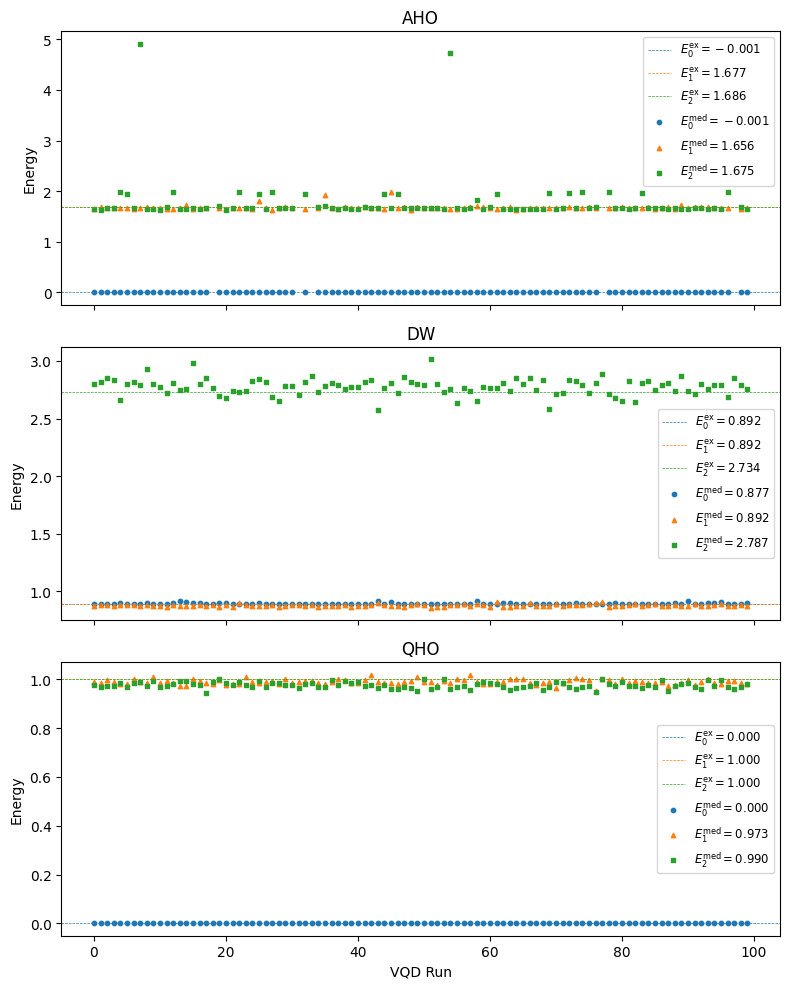

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

converged_only = True
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10), sharex=True)

marker_styles = ['o', '^', 's']
color_map = ['tab:blue', 'tab:orange', 'tab:green']

for plot_idx in range(3):
    data = all_data[plot_idx]
    num_VQD = data['num_VQD']
    potential = data['potential']

    converged = [all(x) for x in data['success']]
    converged_indices = [i for i, success in enumerate(converged) if success]

    if converged_only:
        results = [data['results'][i] for i in converged_indices]
    else:
        results = data['results']

    results = np.sort(results)
    transposed_energies = list(zip(*results))
    medians = [np.median(energies) for energies in transposed_energies]

    ax = axes[plot_idx]

    for i in range(3):
        for run_idx, energies in enumerate(data['results']):
            energy = energies[i]
            if converged[run_idx]:
                ax.scatter(run_idx, energy, s=10, marker=marker_styles[i],
                           color=color_map[i])
            elif not converged_only:
                ax.scatter(run_idx, energy, s=10, marker='x', color='red')

        ax.axhline(data['exact_eigenvalues'][i], color=color_map[i], linestyle='--', linewidth=0.5,
                   label=f"$E_{{{i}}}^{{\\text{{ex}}}} = {data['exact_eigenvalues'][i]:.3f}$")

    for i in range(3):
        ax.scatter([], [], s=20, marker=marker_styles[i], color=color_map[i],
                   label=f"$E_{{{i}}}^{{\\text{{med}}}} = {medians[i]:.3f}$")

    ax.set_title(f"{potential}")#: $\Lambda$ = {data['cutoff']}
    if plot_idx == 2:
        ax.set_xlabel("VQD Run")
    ax.set_ylabel("Energy")
    ax.legend(fontsize='small', markerscale=0.7)

plt.tight_layout()
#plt.show()

# Save the full figure with all 3 plots layered
save_path = os.path.join(folder_path, "VQD-combined.png")
plt.savefig(save_path)


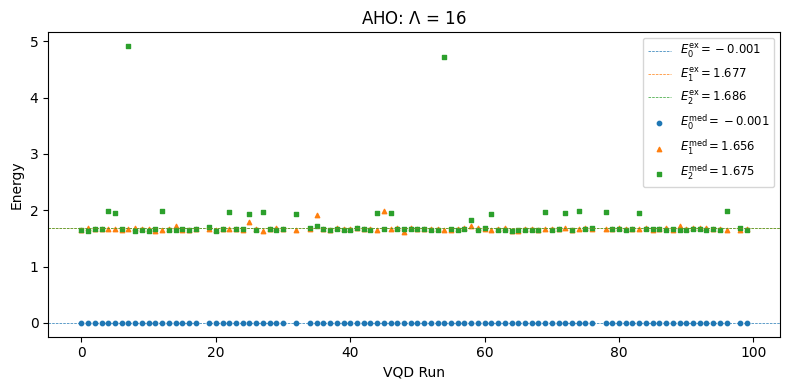

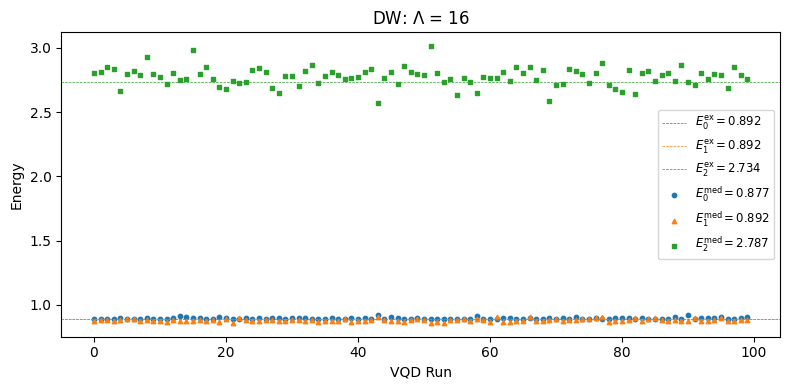

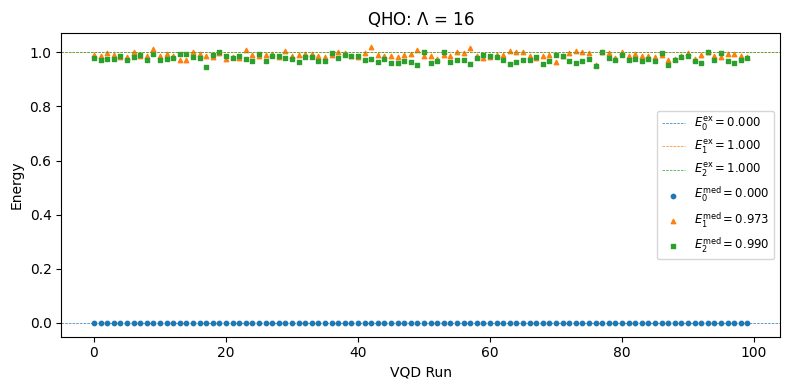

In [33]:
converged_only = True

for i in range(3):
    data = all_data[i]
    num_VQD = data['num_VQD']
    potential = data['potential']

    converged = [all(x) for x in data['success']]
    converged_indices = [i for i, success in enumerate(converged) if success]

    if converged_only:
        results = [data['results'][i] for i in converged_indices]
    else:
        results = data['results']

    results = np.sort(results)

    transposed_energies = list(zip(*results))
    medians = [np.median(energies) for energies in transposed_energies]

    plt.figure(figsize=(8, 4))

    marker_styles = ['o', '^', 's']
    color_map = ['tab:blue', 'tab:orange', 'tab:green']

    for i in range(3):
        for run_idx, energies in enumerate(data['results']):
            energy = energies[i]
            if converged[run_idx]:
                plt.scatter(run_idx, energy, s=10, marker=marker_styles[i],
                            color=color_map[i])
            elif not converged_only:
                plt.scatter(run_idx, energy, s=10, marker='x', color='red')

        plt.axhline(data['exact_eigenvalues'][i], color=color_map[i], linestyle='--', linewidth=0.5,
                    label=f"$E_{{{i}}}^{{\\text{{ex}}}} = {data['exact_eigenvalues'][i]:.3f}$")

    for i in range(3):
        plt.scatter([], [], s=20, marker=marker_styles[i], color=color_map[i],
                    label=f"$E_{{{i}}}^{{\\text{{med}}}} = {medians[i]:.3f}$")


    plt.xlabel("VQD Run")
    plt.ylabel("Energy")
    plt.title(f"{data['potential']}: $\Lambda$ = {data['cutoff']}")
    plt.legend(fontsize='small', markerscale=0.7)
    plt.tight_layout()
    #plt.show()
    path = os.path.join(folder_path,potential,f"VQD-{potential}16.png")
    plt.savefig(path)


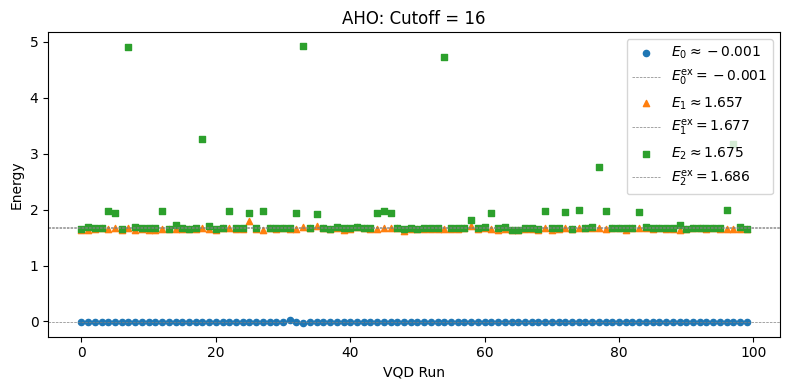

In [15]:
converged_only = False
data = all_data [0]
num_VQD = data['num_VQD']

converged = [all(x) for x in data['success']]
converged_indices = [i for i, success in enumerate(converged) if success]

if converged_only:
    results = [data['results'][i] for i in converged_indices]
else:
    results = data['results']

results = np.sort(results)

transposed_energies = list(zip(*results))
medians = [np.median(energies) for energies in transposed_energies]


plt.figure(figsize=(8, 4))

marker_styles = ['o', '^', 's']  # Circle, Triangle, Square

for i, energies in enumerate(transposed_energies):
    x_vals = range(len(energies))
    marker = marker_styles[i]
    plt.scatter(x_vals, energies, s=20, marker=marker,
                label=f"$E_{{{i}}} \\approx {medians[i]:.3f}$")
    plt.axhline(data['exact_eigenvalues'][i], color='gray', linestyle='--', linewidth=0.5,
                label=f"$E_{{{i}}}^{{\\text{{ex}}}} = {data['exact_eigenvalues'][i]:.3f}$")

plt.xlabel("VQD Run")
plt.ylabel("Energy")
plt.title(f"{data['potential']}: Cutoff = {data['cutoff']}")
plt.legend()
plt.tight_layout()
plt.show()


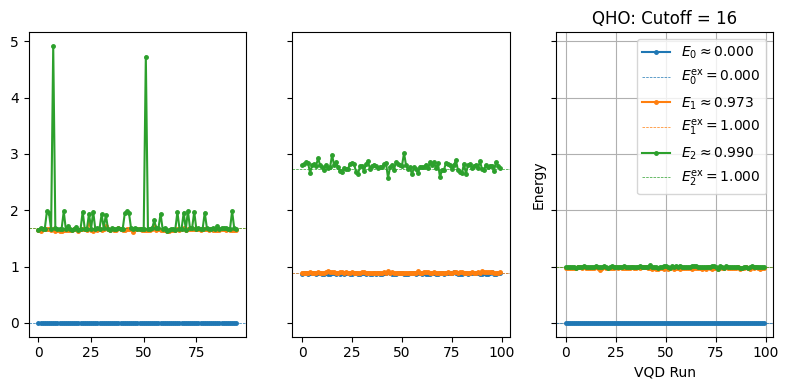

In [8]:
sort=True

fig, axes = plt.subplots(1, 3, figsize=(8, 4), sharey=True)

for i, potential in enumerate(potentials):

    data = all_data[i]
    axs = axes[i]

    num_VQD = data['num_VQD']
    converged = [all(x) for x in data['success']]
    converged_indices = [i for i, success in enumerate(converged) if success]

    if converged_only:
        results = [data['results'][i] for i in converged_indices]
    else:
        results = data['results']

    results = np.sort(results)

    transposed_energies = list(zip(*results))
    medians = [np.median(energies) for energies in transposed_energies]

    # Plotting
    #plt.figure(figsize=(8, 5))
    

    for i, energies in enumerate(transposed_energies):
        line, = axs.plot(range(len(transposed_energies[0])), energies, marker='o', markersize=2.5, linestyle='-', label=f"$E_{{{i}}} \\approx {medians[i]:.3f}$")
        axs.axhline(data['exact_eigenvalues'][i], color = line.get_color(), linestyle='--', linewidth=0.5, label=f"$E_{{{i}}}^{{\\text{{ex}}}} = {data['exact_eigenvalues'][i]:.3f}$")

plt.xlabel("VQD Run")
plt.ylabel("Energy")
plt.title(f"{data['potential']}: Cutoff = {data['cutoff']}")
#plt.xticks(range(1, num_VQD + 1))
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()